In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from sklearn import metrics
from numpy.typing import NDArray

In [3]:
def simple_sin(x):
    return np.sin(x)

def inverterd_sin(x):
    return np.sin(x**(-1))

def singum(x):
    return np.sign(np.sin(8*x))

In [4]:
n_samples = 100
n2_predictions = 200
n4_predictions = 400
n10_predictions = 1000

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin=simple_sin(x)
y_inverted_sin=inverterd_sin(x)
y_signum=singum(x)


In [5]:
def sample_hold_kernel(x, xp, yp):

    def func(x0):
        if x0 <= xp[0]:
            return yp[0]
        if x0 >= xp[-1]:
            return yp[-1]
        k = 0
        while x0 > xp[k]:
            k += 1
        return yp[k-1]
    
    if isinstance(x,float):
        return func(x)
    elif isinstance(x, list):
        return [func(x) for x in x]
    elif isinstance(x, np.ndarray):
        return np.asarray([func(x) for x in x])
    else:
        raise TypeError('argument must be float, list, or ndarray')

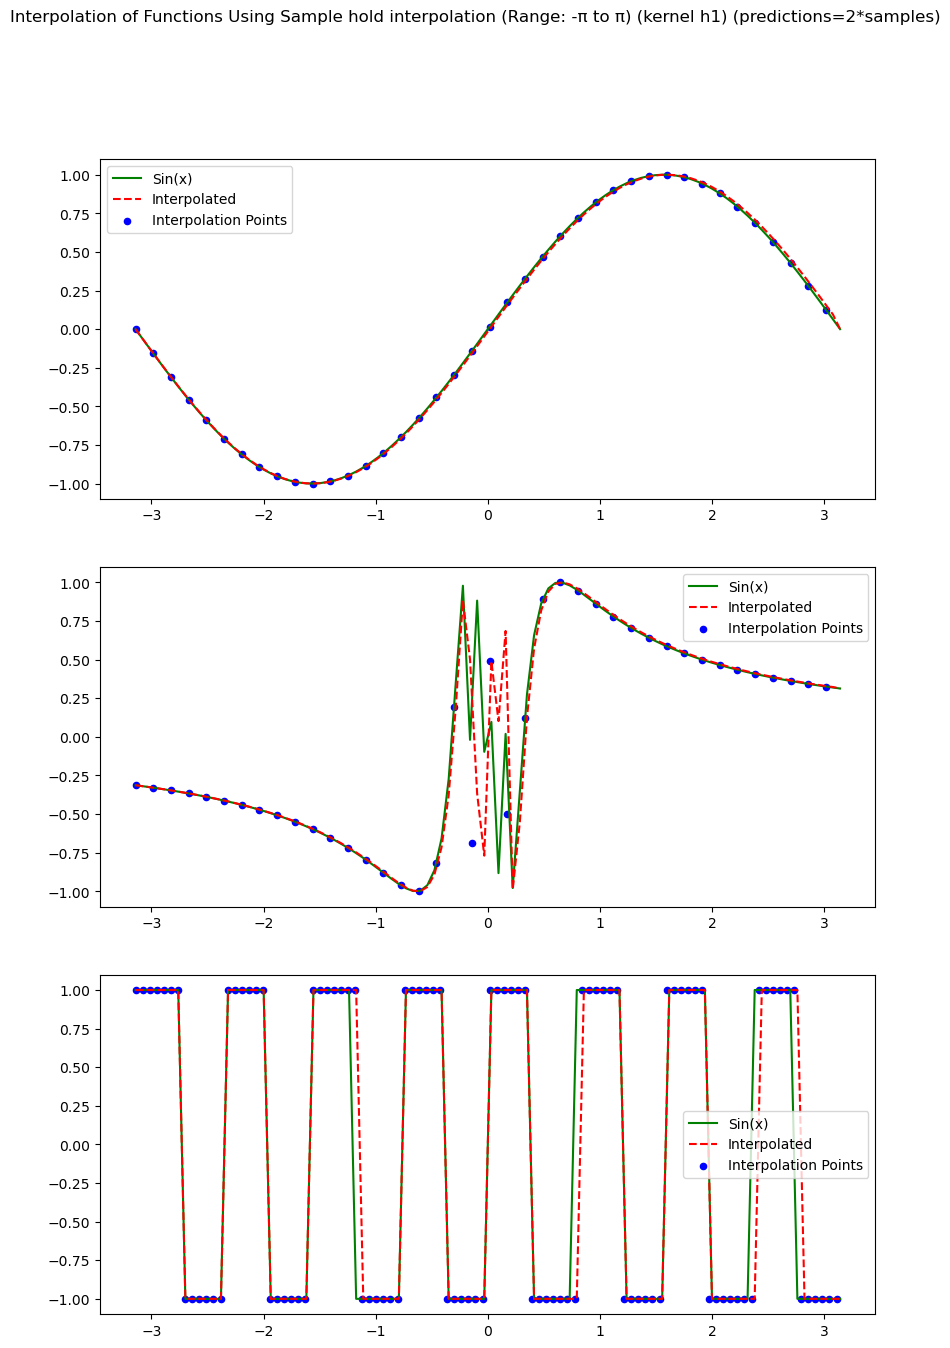

In [ ]:

xp_n2 = np.linspace(-np.pi, np.pi, n2_predictions)

yp_simple_sin = simple_sin(xp_n2)
yp_inverterd_sin = inverterd_sin(xp_n2)
yp_signum=singum(xp_n2)

y_simple_sin_interp = sample_hold_kernel(x,xp_n2,yp_simple_sin)
y_inverted_sin_interp=sample_hold_kernel(x,xp_n2,yp_inverterd_sin)
y_signum_interp=sample_hold_kernel(x,xp_n2,yp_signum)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample hold interpolation (Range: -π to π) (kernel h1) (predictions=2*samples)")

axs[0].plot(x,y_simple_sin, label='Sin(x)',color='green')
axs[0].plot(x,y_simple_sin_interp,'--',label='Interpolated',color='red')
axs[0].scatter(xp_n2[::5],yp_simple_sin[::5], label='Interpolation Points',color='blue',s=20)
axs[0].legend()

axs[1].plot(x,y_inverted_sin, label='Sin(x)',color='green')
axs[1].plot(x,y_inverted_sin_interp,'--',label='Interpolated',color='red')
axs[1].scatter(xp_n2[::5],yp_inverterd_sin[::5], label='Interpolation Points',color='blue',s=20)
axs[1].legend()

axs[2].plot(x,y_signum, label='Sin(x)',color='green')
axs[2].plot(x,y_signum_interp,'--',label='Interpolated',color='red')
axs[2].scatter(xp_n2[::2],yp_signum[::2], label='Interpolation Points',color='blue',s=20)
axs[2].legend()

In [ ]:
def nearest_neighbor_half_interval(x, y, x_interp):
    new_y = np.zeros_like(x_interp)
    for i, nx in enumerate(x_interp):
        distances = np.abs(x - nx)
        if np.any(distances <= 0.5):  
            closest_idx = np.argmin(distances)
            new_y[i] = y[closest_idx]
        else:
            new_y[i] = 0  
    return new_y


MSE for Fucntion Sin(x) 2*n predictions: 0.0001745327
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0001745327
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.0001745327


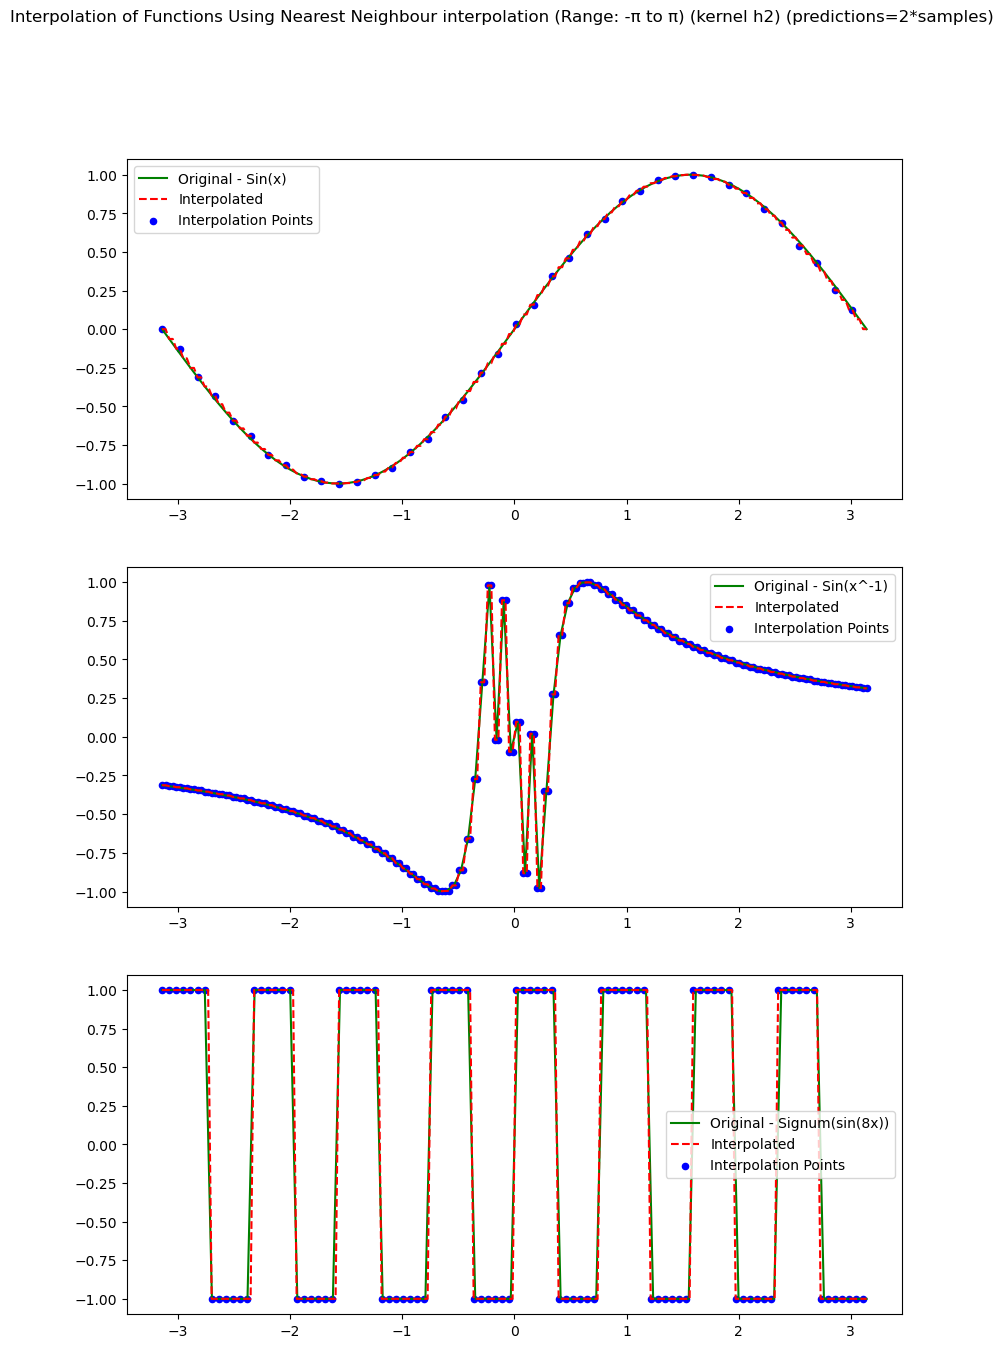

In [ ]:

x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = nearest_neighbor_half_interval(x, y_simple_sin, x_n2_interp)
y_inverted_sin_interp = nearest_neighbor_half_interval(x, y_inverted_sin, x_n2_interp)
y_signum_interp = nearest_neighbor_half_interval(x, y_signum, x_n2_interp)

y_simple_sin_true=simple_sin(x_n2_interp)
y_inverted_sin_true=inverterd_sin(x_n2_interp)
y_signum_true=singum(x_n2_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Nearest Neighbour interpolation (Range: -π to π) (kernel h2) (predictions=2*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n2_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n2_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n2_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n2_interp[::1], y_inverted_sin_interp[::1] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n2_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n2_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")


MSE for Fucntion Sin(x) 2*n predictions: 0.0001673958
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0001673958
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.0001673958


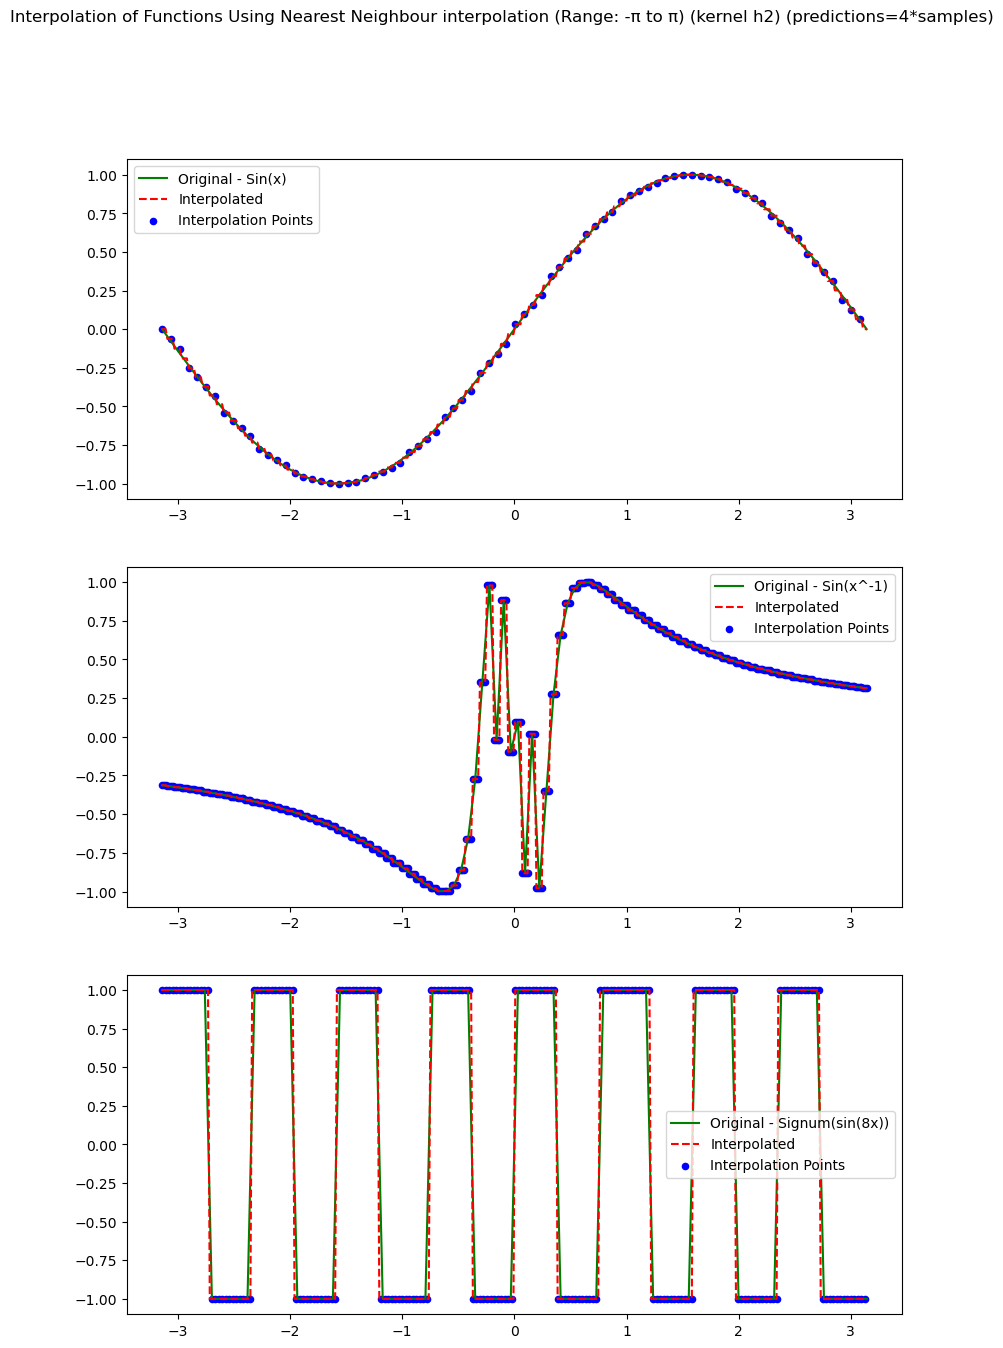

In [ ]:
x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

fig, axs=plt.subplots(3,1, figsize=(10,15))

y_simple_sin_interp = nearest_neighbor_half_interval(x, y_simple_sin, x_n4_interp)
y_inverted_sin_interp = nearest_neighbor_half_interval(x, y_inverted_sin, x_n4_interp)
y_signum_interp = nearest_neighbor_half_interval(x, y_signum, x_n4_interp)

y_simple_sin_true=simple_sin(x_n4_interp)
y_inverted_sin_true=inverterd_sin(x_n4_interp)
y_signum_true=singum(x_n4_interp)

fig.suptitle("Interpolation of Functions Using Nearest Neighbour interpolation (Range: -π to π) (kernel h2) (predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n4_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n4_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n4_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n4_interp[::1], y_inverted_sin_interp[::1] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n4_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n4_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")


MSE for Fucntion Sin(x) 2*n predictions: 0.0001676434
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0001676434
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.0001676434


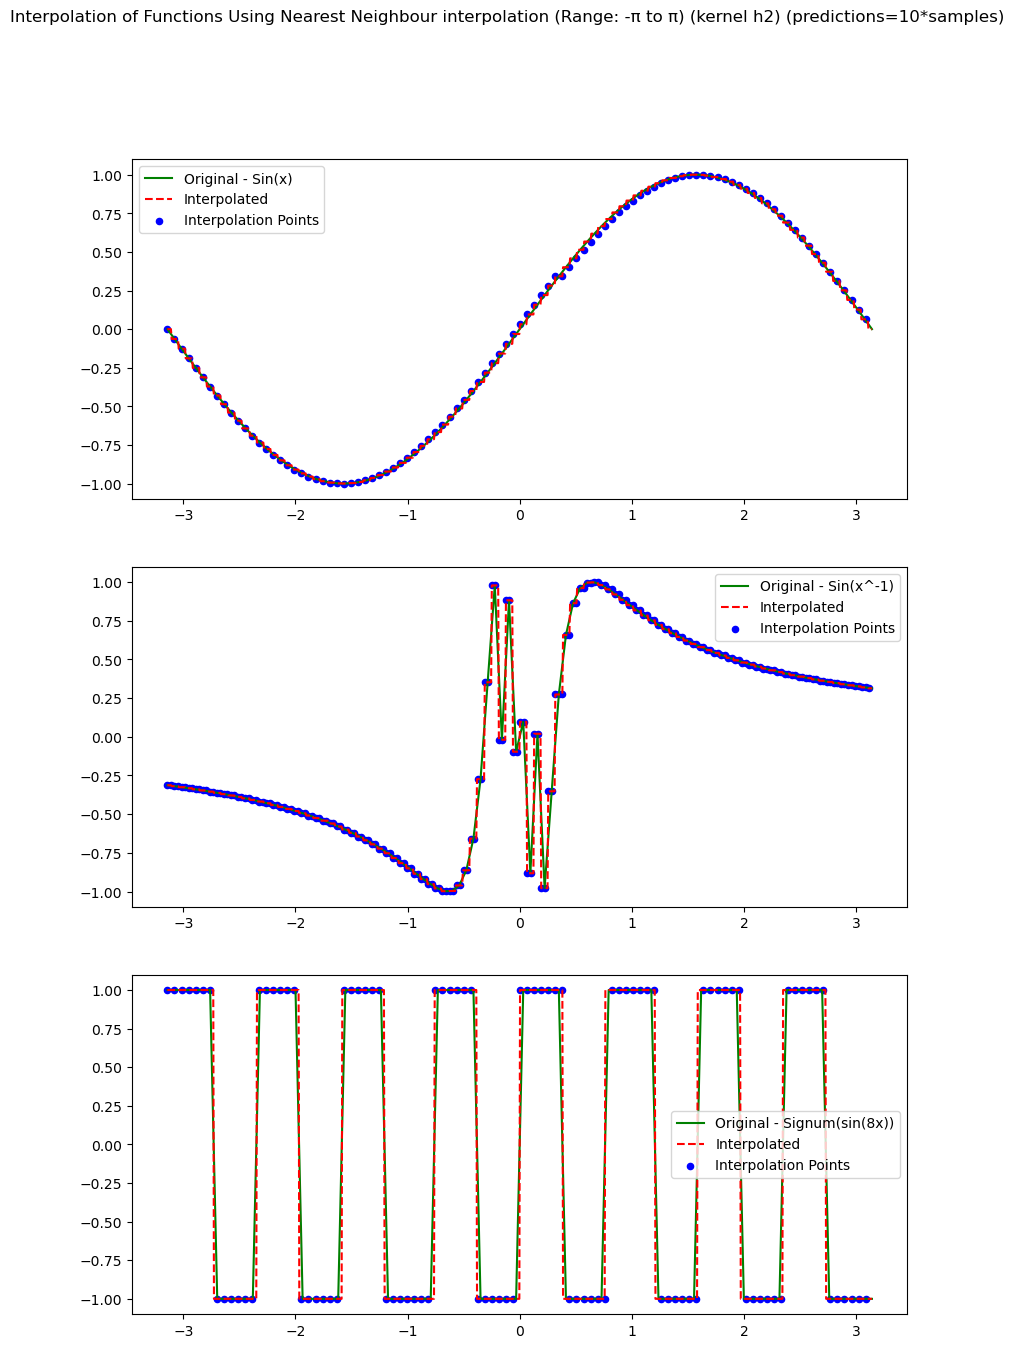

In [ ]:
x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

fig, axs=plt.subplots(3,1, figsize=(10,15))

y_simple_sin_interp = nearest_neighbor_half_interval(x, y_simple_sin, x_n10_interp)
y_inverted_sin_interp = nearest_neighbor_half_interval(x, y_inverted_sin, x_n10_interp)
y_signum_interp = nearest_neighbor_half_interval(x, y_signum, x_n10_interp)

y_simple_sin_true=simple_sin(x_n10_interp)
y_inverted_sin_true=inverterd_sin(x_n10_interp)
y_signum_true=singum(x_n10_interp)

fig.suptitle("Interpolation of Functions Using Nearest Neighbour interpolation (Range: -π to π) (kernel h2) (predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n10_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n10_interp[::10], y_simple_sin_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n10_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n10_interp[::5], y_inverted_sin_interp[::5] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n10_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n10_interp[::10], y_signum_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
